# Exploratory Data Analysis

In this file, we will analyse the data to find the best features for the AI.

In [6]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Downloading the Data

To download the data, just run the following command:

In [ ]:
%%bash
wget https://nas.chongminggao.top:4430/datasets/KuaiRec.zip --no-check-certificate
unzip KuaiRec.zip -d ./dataset/

If you already have the dataset on your computer, you can update this variable with the location of the directory.

In [4]:
DATASET_PATH = "dataset"

## Users

Users features are located in the file **user_features.csv**. Here is an overview of its content.

In [5]:
users = pd.read_csv(f"{DATASET_PATH}/user_features.csv")

users.head()

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


This csv contains **7176** unique users, with some features for each of them. Here are all the features available:

- We first have explicit features:
    - **user_active_degree**: string, its values being *UNKNOWN*, *middle_active*, *high_active* or *full_active*
    - **is_lowactive_period**: int, representing a boolean (0 for false and 1 for true)
    - **is_live_streamer**: int, representing a boolean (0 for false and 1 for true)
    - **is_video_author**: int, representing a boolean (0 for false and 1 for true)

- We then have features about the user's social network:
    - **follow_user_num** and **follow_user_num_range**: int and human-readable interval
    - **fans_user_num** and **fans_user_num_range**: int and human-readable interval
    - **friend_user_num** and **friend_user_num_range**: int and human-readable interval
    - **register_days** and **register_days_range**: int and human-readable interval

- Finally, we have onehot-encoded features about the user:
    - **onehot_feat0** to **onehot_feat3** and **onehot_feat5** to **onehot_feat11**: int
    - **onehot_feat4** and **onehot_feat12** to **onehot_feat17**: float / NaN

We also have another file, containing data about the user's social network only. Here is an overview of its content.

In [ ]:
social_network = pd.read_csv(f"{DATASET_PATH}/social_network.csv")

social_network.head()

,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]


However, this file only contains data about **472** users, which is way less than the other one. Moreover, the **friend_list** column is not made of lists, but of strings, which makes it's user harder.

Finally, the length of this column does not match with any of the social network columns of the *users* dataframe.

This is why I decided to not use this file for the project.

### Selecting meaningful features

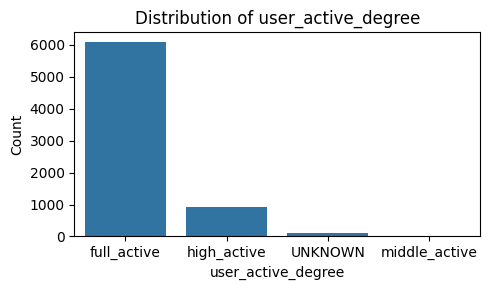

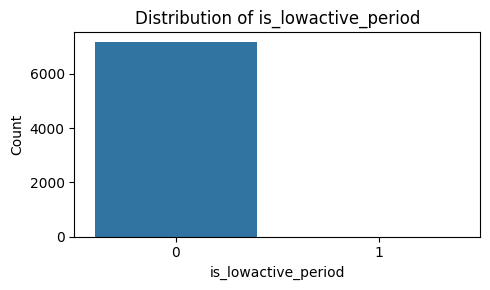

In [4]:
def display_column_distribution(df, column_name, top_n=10, figsize=(5, 3)):
    value_counts = df[column_name].value_counts().head(top_n)
    plt.figure(figsize=figsize)
    
    sns.barplot(x=value_counts.index.astype(str), y=value_counts.values)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    if len(value_counts) > 10:
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

display_column_distribution(users, 'user_active_degree')
display_column_distribution(users, 'is_lowactive_period')

We see that most users are fully active and are in an active period.

- Even if some users are *high_active*, it is similar to *full_active* and could be fused into one category. Moreover, *middle_active* is almost absent. This column does not bring meaningful data.
- It is even more obvious with *is_low_active*.

So, I decided to remove these two columns from the dataframe.

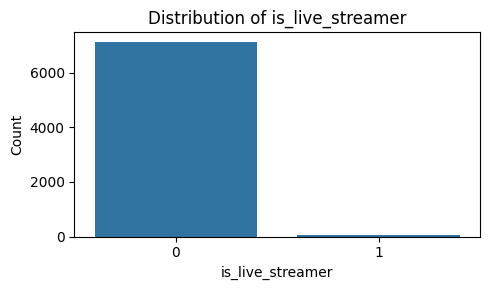

In [9]:
display_column_distribution(users, 'is_live_streamer')

We see that very few users are live streamer. In addition, being a live streamer influence only a little the videos someone will watch. So I removed this column from the dataframe.

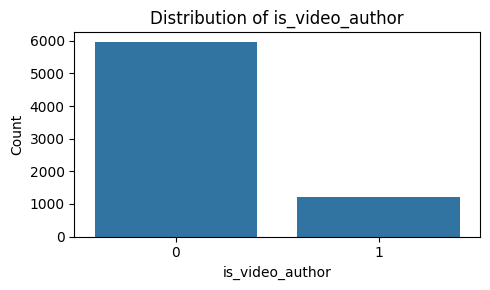

In [10]:
display_column_distribution(users, 'is_video_author')

There are more video authors, but again this have only a small influence. So I removed this column from the dataframe too.

About the *social network's features*, we only have the number of followers, friends... We don't have a list of user ids, so we cannot create similarities between users. Moreover, the number of followers isn't to most useful information for video recommendation. Therefore, i decided to remove these columns from the dataframe:
- **follow_user_num** and **follow_user_num_range**
- **fans_user_num** and **fans_user_num_range**
- **friend_user_num** and **friend_user_num_range**
- **register_days** and **register_days_range**

In [ ]:
user_columns = [
    "user_id", "onehot_feat0", "onehot_feat1", "onehot_feat2", "onehot_feat3", "onehot_feat4", "onehot_feat5",
    "onehot_feat6", "onehot_feat7", "onehot_feat8", "onehot_feat9", "onehot_feat10", "onehot_feat11",
    "onehot_feat12", "onehot_feat13", "onehot_feat14", "onehot_feat15", "onehot_feat16", "onehot_feat17"
]

users = pd.read_csv(f"{DATASET_PATH}/user_features.csv", usecols=user_columns)

In the end, I decided to only keep the onehot encoded features. Since we have 18 of them, this should be enough for the recommendation system.

### Handling of NaN values

Since we do not have information for these users, I simply replaced all NaN values by **0**. I also make sure to only have *float* typed values to facilitate the learning, except for the **user_id** column.

In [25]:
users = users.fillna(0).astype(float)
users['user_id'] = users['user_id'].astype(int)

## Items (videos)

Item features are located in two files: **item_categories.csv** and **item_daily_features.csv**. First, let's have an overview of **item_categories.csv**: 

In [ ]:
item_categories = pd.read_csv(f"{DATASET_PATH}/item_categories.csv")
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


This csv contains **10728** unique items. Here again, the **feat** column is made of strings representing a list. Let's convert it to a real list and check its data.

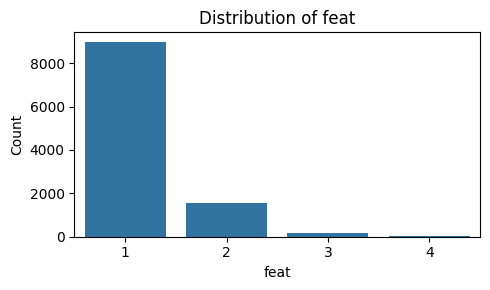

In [38]:
def display_list_column_distribution(df, column_name, top_n=10, figsize=(5, 3)):
    df[column_name] = df[column_name].apply(ast.literal_eval)
    df[column_name] = df[column_name].apply(len)
    value_counts = df[column_name].value_counts().head(top_n)
    plt.figure(figsize=figsize)
    
    sns.barplot(x=value_counts.index.astype(str), y=value_counts.values)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    if len(value_counts) > 10:
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

display_list_column_distribution(item_categories, 'feat')

Most items have one feat, some of them have 2 and only very few have 3 or 4 feats.

In [ ]:
item_daily_features = pd.read_csv(f"{DATASET_PATH}/item_daily_features.csv")
item_daily_features.head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


This csv contains daily features about each item. First of all, this dataframe also has a **video_tag_id**, which seems to correspond to the first feat of the previous dataframe. Since the majority of the videos only have 1 feat, I decided to keep this column and not use the previous dataframe.

### Handling of daily data

As its name indicate, **item_daily_features** has daily features about each video. This is interesting to determine most popular videos at a given moment.

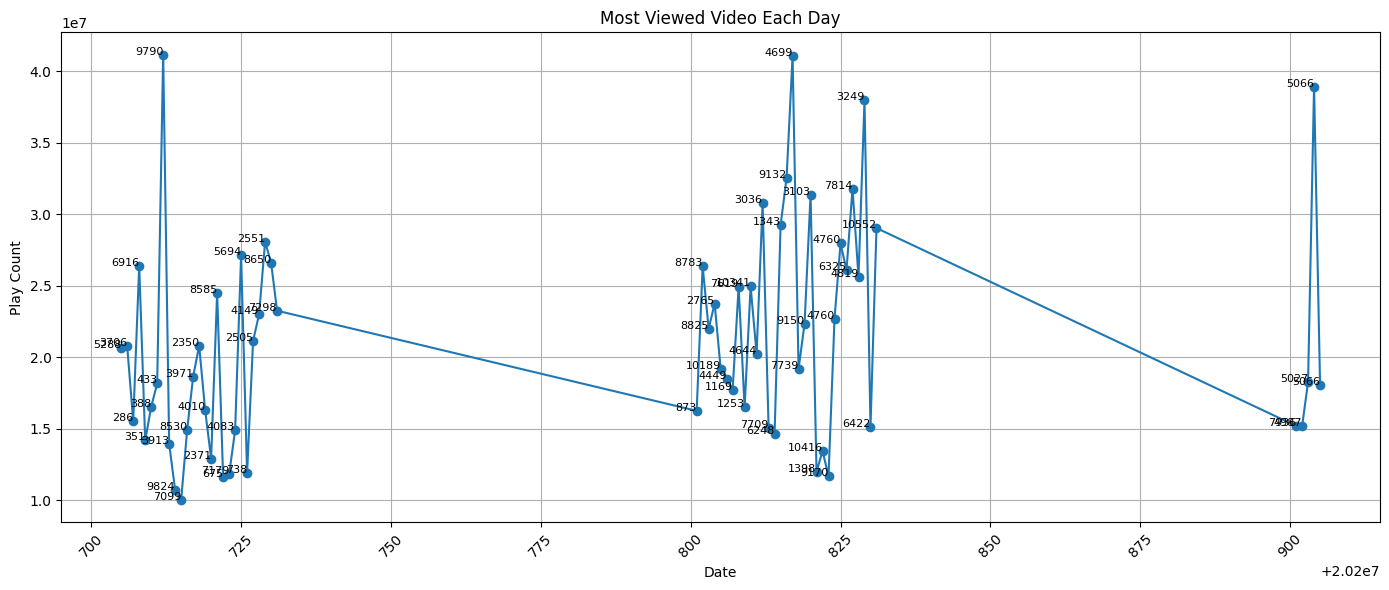

In [20]:
most_viewed_per_day = item_daily_features.loc[item_daily_features.groupby('date')['play_cnt'].idxmax()]
most_viewed_per_day = most_viewed_per_day.sort_values('date')

plt.figure(figsize=(14, 6))
plt.plot(most_viewed_per_day['date'], most_viewed_per_day['play_cnt'], marker='o')
plt.title('Most Viewed Video Each Day')
plt.xlabel('Date')
plt.ylabel('Play Count')
plt.xticks(rotation=45)

for i, row in most_viewed_per_day.iterrows():
    plt.text(row['date'], row['play_cnt'], str(row['video_id']), fontsize=8, ha='right')

plt.tight_layout()
plt.grid(True)
plt.show()

We see that the most viewed video almost changes every day, depending on the "trend" and the videos added. However, for my recommendation system, I just want to have general features about each video. For each video, I will calculate the mean for the daily features, to have a general idea of how popular the video is.

### Selecting meaningful features

This **item_daily_features** has a lot of columns, so we need to keep the most meaningful data. Let's analyse the correlation matrix to see if some columns have similar data.

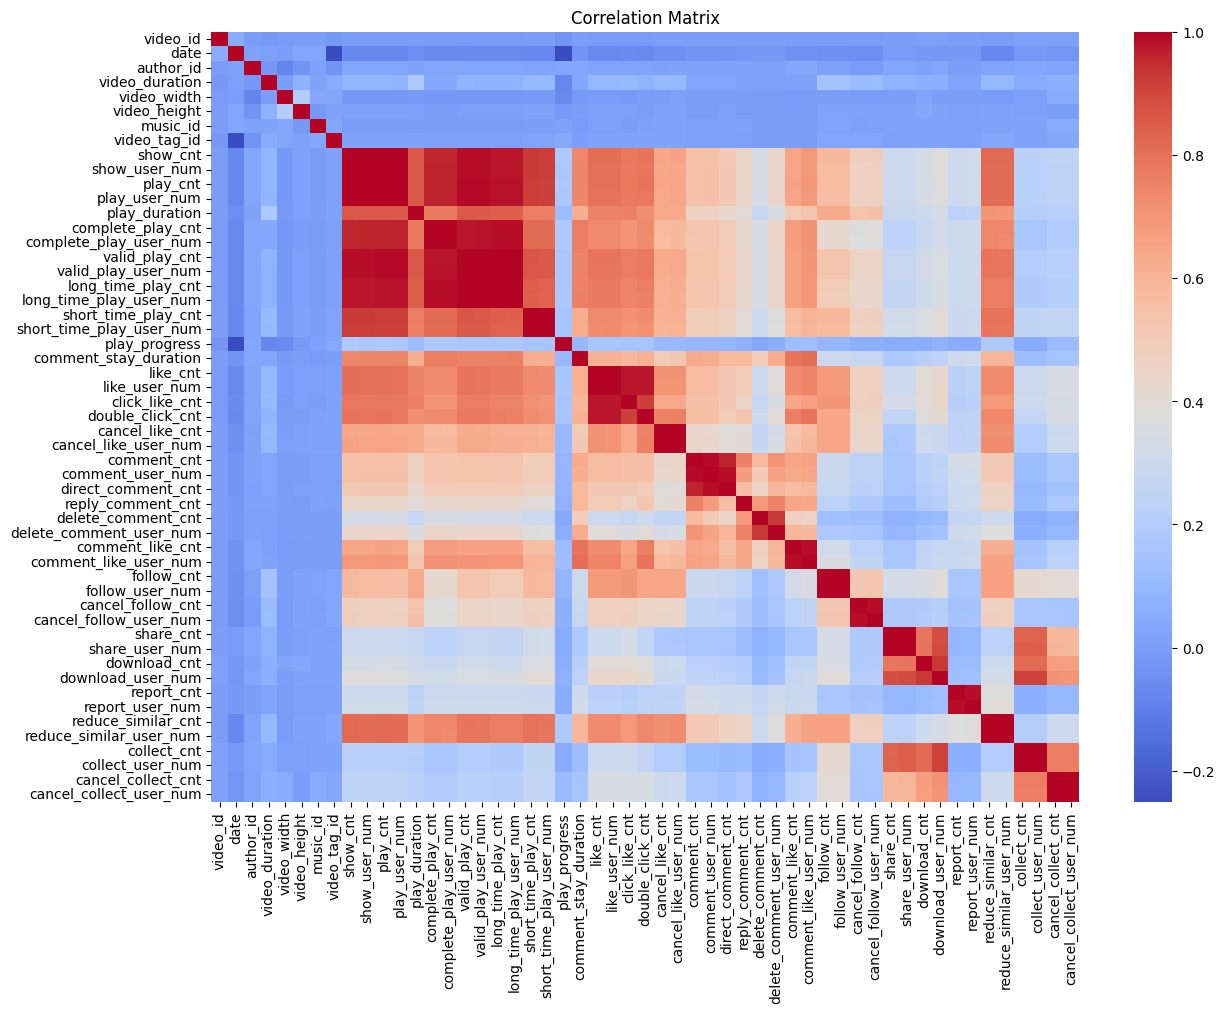

In [7]:
plt.figure(figsize=(14, 10))
numeric_cols = item_daily_features.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see that a lot of features correlate almost perfectly, meaning they give the same type of information.
- Columns like **X_cnt** and **X_user_num** are often very similar, but they are not always the same. For example, **delete_comment_cnt** and **delete_comment_user_num** do not correlate excatly, just like **download_cnt** and **download_user_num**.
- **like_cnt** and **click_like_cnt** correlate a lot which is logical, where **click_like_cnt** and **cancel_like_cnt** correlate way less.
- We see that a lot of columns have a high similarity:
    - **show_cnt**
    - **play_cnt**
    - **complete_play_cnt**
    - **valid_play_cnt**
    - **long_time_play_cnt**
- But there are also some columns with very few similarity with others:
    - **music_id**
    - **video_tag_id**
    - **play_duration**
    - **share_cnt**
    - **report_cnt**

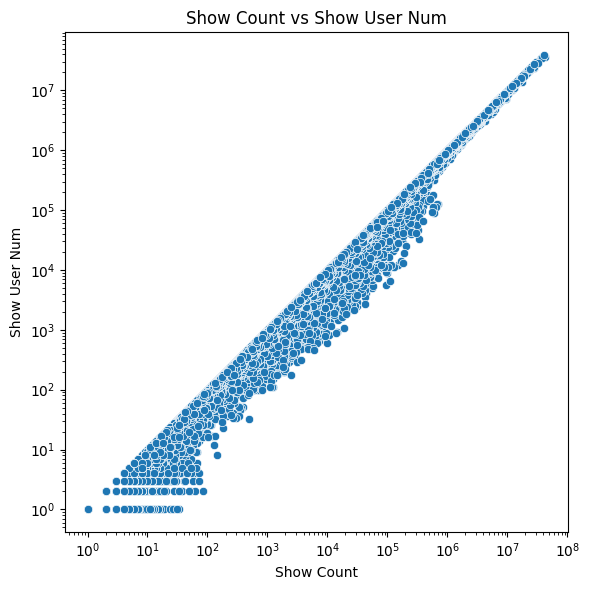

In [15]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=item_daily_features, x='show_cnt', y='show_user_num')
plt.title('Show Count vs Show User Num')
plt.xlabel('Show Count')
plt.ylabel('Show User Num')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

We see that **show_cnt** is bigger than **show_user_num**, this is because some users might watch the video multiple times. However, theses columns still are very similar, especially when **show_cnt** is very big. To avoid having to many values in our dataset, I decided to keep only one of the two.

When we have two columns **X_cnt** and **X_user_num**, I decided to keep to **X_cnt**.

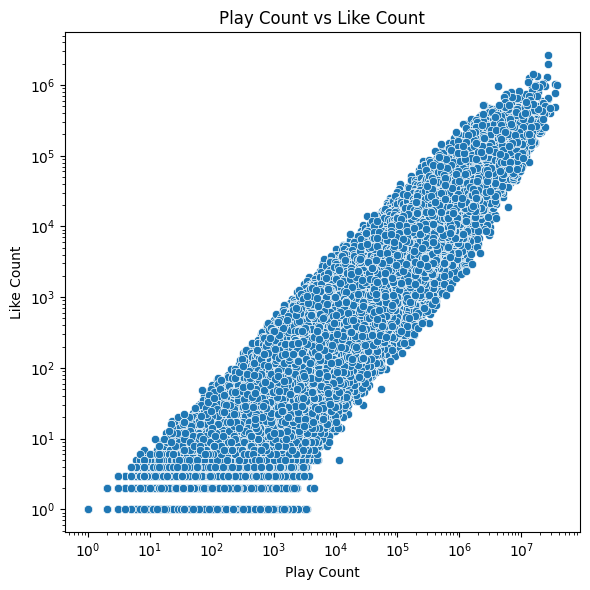

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=item_daily_features, x='play_cnt', y='like_cnt')
plt.title('Play Count vs Like Count')
plt.xlabel('Play Count')
plt.ylabel('Like Count')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

We see here that **play_count** and **like_count** seem to follow a linear function, meaning that more a video is viewed more it is liked. However, when the **play_count** is lower, the interval of **like_count** is bigger. This means that videos might be viewed a little or a lot and still have little likes. So keeping both values is important to detect poor videos.

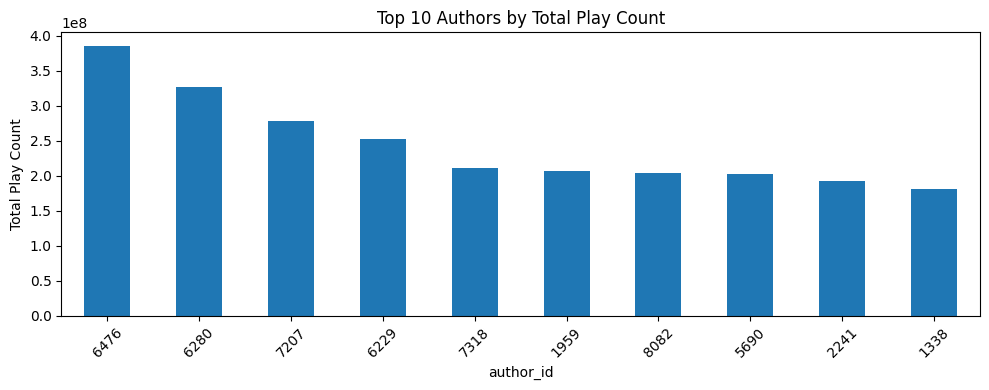

In [12]:
top_authors = item_daily_features.groupby('author_id')['play_cnt'].sum().sort_values(ascending=False).head(10)
top_authors.plot(kind='bar', title='Top 10 Authors by Total Play Count', figsize=(10, 4))
plt.ylabel('Total Play Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There are more popular **author_id** which is normal, but the gap is not that huge. Moreover, we see that besides the first 4 authors, others seem to have the same popularity. Keeping this feature is important, because users are more likely to watch videos from popular authors.

After this overview, I decided to keep the following columns as features in my dataframe:
- **music_id** and **video_tag_id**
- **play_cnt** and **play_duration**
- **long_time_play_cnt** and **short_time_play_cnt**
- **play_progress**
- **comment_stay_duration** and **comment_like_cnt**
- **like_cnt** and **cancel_like_cnt**
- **comment_cnt** and **delete_comment_cnt**
- **follow_cnt** and **cancel_follow_cnt**
- **share_cnt** and **download_cnt**

Features not mentionned here:
- Are similar to the selected ones (**X_num_user** or **show_cnt**)
- Are not meaningful for the recommendation system (**report_cnt** or **collect_cnt**)

## Truth values

Concerning the truth values, we also have two files: **big_matrix.csv** and **small_matrix.csv**. Let's analyse them.

In [ ]:
small_matrix = pd.read_csv(f"{DATASET_PATH}/small_matrix.csv")
small_matrix.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,2.0e+07,1.6e+09,0.7
1,14,183,11635,6100,2020-07-05 05:28:00.057,2.0e+07,1.6e+09,1.9
2,14,3649,22422,10867,2020-07-05 05:29:09.479,2.0e+07,1.6e+09,2.1
3,14,5262,4479,7908,2020-07-05 05:30:43.285,2.0e+07,1.6e+09,0.6
4,14,8234,4602,11000,2020-07-05 05:35:43.459,2.0e+07,1.6e+09,0.4


We have tuples of **user_id** and **video_id**. For each tuple we have the date when the user watched the video and the **watch_ratio** of the user.

In [ ]:
big_matrix = pd.read_csv(f"{DATASET_PATH}/big_matrix.csv")
big_matrix.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.6e+09,1.3e+00
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.6e+09,1.2e+00
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.6e+09,1.1e-01
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.6e+09,9.0e-02
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.6e+09,7.8e-02


Big matrix follow the exact same structure.

The very important value here is **watch_ratio**. It represent how much the user liked the video and want to watch it again. The bigger it is, the most the user enjoy it. This column will represent my truth values for the training.

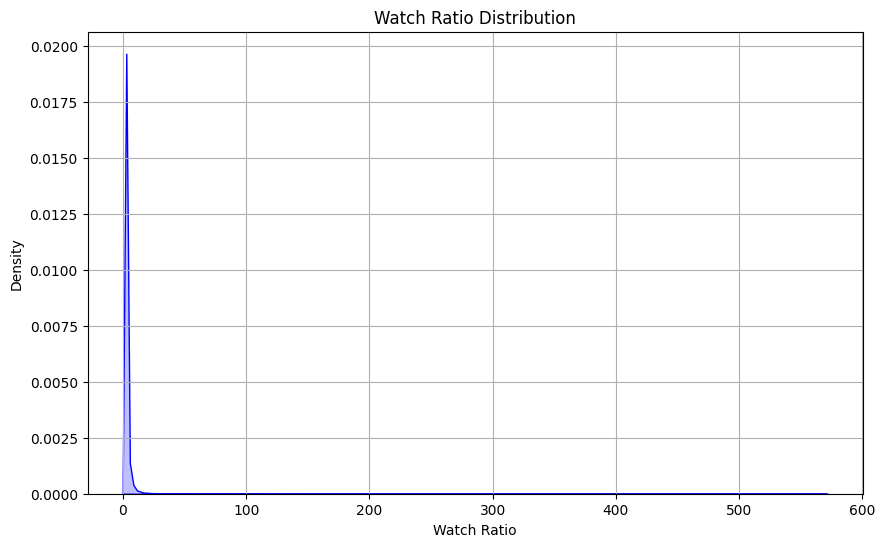

In [ ]:
def display_watch_ration(df):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='watch_ratio', fill=True, color='blue')
    plt.title('Watch Ratio Distribution')
    plt.xlabel('Watch Ratio')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

display_watch_ration(small_matrix)

We see that some users watch the same video a huge number of time. Let's change this, so that all watch_ration over 5 are set to 5.

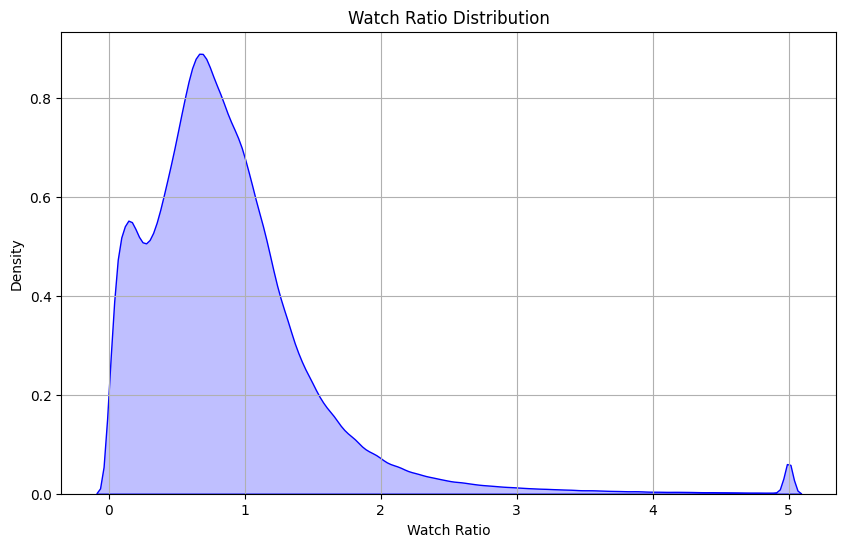

In [ ]:
small_matrix['watch_ratio'] = small_matrix['watch_ratio'].clip(upper=5)
display_watch_ration(small_matrix)

The watch ratio is mainly between 0 and 1. There is still an important part bewteen 1 and 2, but after 2 it highly decreases. Surprisingly, the density is meaningful at five, meaning that there is still some users that watched the video at least 5 times which is insane.

In [10]:
common = big_matrix.merge(small_matrix, on=['user_id', 'video_id'], how='inner')
common

,user_id,video_id,play_duration_x,video_duration_x,time_x,date_x,timestamp_x,watch_ratio_x,play_duration_y,video_duration_y,time_y,date_y,timestamp_y,watch_ratio_y


There are no common pairs (user_id, video_id), meaning that both dataframe bring different data.

In [11]:
print("Length of small matrix:", len(small_matrix))
print("Length of big matrix:", len(big_matrix))

Length of small matrix: 4676570
Length of big matrix: 12530806


We see that big matrix is more than 2.5 times bigger than small matrix. We will then use **big_matrix** to train our recommendation system.

## Functions to load the features

In [ ]:
def user_feats():
    user_columns = [
        "user_id", "onehot_feat0", "onehot_feat1", "onehot_feat2", "onehot_feat3", "onehot_feat4", "onehot_feat5",
        "onehot_feat6", "onehot_feat7", "onehot_feat8", "onehot_feat9", "onehot_feat10", "onehot_feat11",
        "onehot_feat12", "onehot_feat13", "onehot_feat14", "onehot_feat15", "onehot_feat16", "onehot_feat17"
    ]

    users = pd.read_csv(f"{DATASET_PATH}/user_features.csv", usecols=user_columns)

    users = users.fillna(0).astype(float)
    users['user_id'] = users['user_id'].astype(int)
    return users

In [ ]:
def item_feats():
    item_cols = [
        'video_id', 'music_id', 'video_tag_id', 'play_cnt',
        'play_duration', 'long_time_play_cnt', 'short_time_play_cnt',
        'play_progress', 'comment_stay_duration', 'like_cnt',
        'cancel_like_cnt', 'comment_cnt', 'delete_comment_cnt',
        'comment_like_cnt', 'follow_cnt', 'cancel_follow_cnt',
        'share_cnt', 'download_cnt'
    ]
    
    cols_to_aggregate = [
        'play_cnt', 'play_duration', 'long_time_play_cnt',
        'short_time_play_cnt', 'play_progress', 'comment_stay_duration',
        'like_cnt', 'cancel_like_cnt', 'comment_cnt',
        'delete_comment_cnt', 'comment_like_cnt', 'follow_cnt',
        'cancel_follow_cnt', 'share_cnt', 'download_cnt'
    ]
    
    items = pd.read_csv(f"{DATASET_PATH}/item_daily_features.csv", usecols=item_cols)
    

    agg_items = items.groupby('video_id').agg({
        col: 'mean' for col in cols_to_aggregate
    }).reset_index()
    
    last_items = items.sort_values('video_id').drop_duplicates(
        subset="video_id", keep="last"
    )[['video_id', 'music_id', 'video_tag_id']]
    
    result = pd.merge(last_items, agg_items, on='video_id')
    return result

In [ ]:
def truth_data():
    y_cols = ['user_id', 'video_id', 'watch_ratio']
    y = pd.read_csv(f"{DATASET_PATH}/big_matrix.csv", usecols=y_cols)
    y['watch_ratio'] = y['watch_ratio'].clip(upper=5)
    return y